In [1]:
import pandas as pd
import os

# 定义处理并转换日期时间格式的函数
def convert_datetime(dt_str):
    try:
        return pd.to_datetime(dt_str, format='%m%d%Y%H%M', errors='coerce')
    except:
        return pd.NaT

# 处理单个年份的数据
def process_yearly_data(year):
    file_path = f'DATA_nfirs2000-2021/NFIRS{year}/basicincident.txt'
    processed_csv_file = f'morans_data/{year}/basicincident_processed_{year}.csv'
    
    chunk_size = 10000  # 每次读取的行数
    chunks = []
    total_rows = 0  # 记录总行数
    ca_rows = 0  # 记录CA行数

    for chunk in pd.read_csv(file_path, delimiter='^', encoding='latin1', low_memory=False, chunksize=chunk_size):
        total_rows += len(chunk)
        # 过滤出加利福尼亚州的数据
        chunk_ca = chunk[chunk['STATE'] == 'CA']
        ca_rows += len(chunk_ca)

        # 转换日期和时间格式
        chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
        chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
        chunk_ca['LU_CLEAR'] = chunk_ca['LU_CLEAR'].apply(convert_datetime)

        # 丢弃ALARM和ARRIVAL中为空的行
        chunk_ca = chunk_ca.dropna(subset=['ALARM', 'ARRIVAL', 'LU_CLEAR'])

        # 确保列转换为日期时间类型
        if not pd.api.types.is_datetime64_any_dtype(chunk_ca['ALARM']):
            chunk_ca['ALARM'] = pd.to_datetime(chunk_ca['ALARM'], errors='coerce')
        if not pd.api.types.is_datetime64_any_dtype(chunk_ca['ARRIVAL']):
            chunk_ca['ARRIVAL'] = pd.to_datetime(chunk_ca['ARRIVAL'], errors='coerce')
        if not pd.api.types.is_datetime64_any_dtype(chunk_ca['LU_CLEAR']):
            chunk_ca['LU_CLEAR'] = pd.to_datetime(chunk_ca['LU_CLEAR'], errors='coerce')

        # 计算响应时间和解决火灾的时间
        chunk_ca['RESPONSE_TIME'] = (chunk_ca['ARRIVAL'] - chunk_ca['ALARM']).dt.total_seconds() / 60  # 以分钟为单位
        chunk_ca['FIRE_CLEARANCE_TIME'] = (chunk_ca['LU_CLEAR'] - chunk_ca['ARRIVAL']).dt.total_seconds() / 60  # 以分钟为单位

        chunks.append(chunk_ca)

    # 合并所有处理后的数据块
    processed_df = pd.concat(chunks, ignore_index=True)
    
    # 保存为CSV文件
    processed_df.to_csv(processed_csv_file, index=False)
    print(f"Processed data saved to {processed_csv_file} for year {year}")
    print(f"Total rows: {total_rows}, CA rows: {ca_rows}")

# 处理单个年份的数据
for year in range(2015, 2023):
    process_yearly_data(year)


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2015/basicincident_processed_2015.csv for year 2015
Total rows: 2160321, CA rows: 123460


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2016/basicincident_processed_2016.csv for year 2016
Total rows: 25693448, CA rows: 2589083


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2017/basicincident_processed_2017.csv for year 2017
Total rows: 2251431, CA rows: 180769


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2018/basicincident_processed_2018.csv for year 2018
Total rows: 27851695, CA rows: 2997861


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2019/basicincident_processed_2019.csv for year 2019
Total rows: 28534829, CA rows: 3359106


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2020/basicincident_processed_2020.csv for year 2020
Total rows: 2181870, CA rows: 199861


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2021/basicincident_processed_2021.csv for year 2021
Total rows: 2109645, CA rows: 200274


/tmp/ipykernel_1436/1983719486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ALARM'] = chunk_ca['ALARM'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_ca['ARRIVAL'] = chunk_ca['ARRIVAL'].apply(convert_datetime)
/tmp/ipykernel_1436/1983719486.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Processed data saved to morans_data/2022/basicincident_processed_2022.csv for year 2022
Total rows: 2370774, CA rows: 222190


In [4]:
import pandas as pd
import os

# 定义要提取的指标
indicators = ['FDID', 'INC_TYPE', 'ALARM', 'ARRIVAL', 'LU_CLEAR', 'DISTRICT', 'PROP_LOSS', 
              'CONT_LOSS', 'PROP_VAL', 'CONT_VAL', 'PROP_USE', 'RESPONSE_TIME', 'FIRE_CLEARANCE_TIME']

# 定义年份范围
years = range(2015, 2022)

# 函数：从ALARM列提取月份和小时
def extract_datetime_features(df):
    df['ALARM'] = pd.to_datetime(df['ALARM'], errors='coerce')
    df['MONTH'] = df['ALARM'].dt.month
    df['HOUR'] = df['ALARM'].dt.hour
    return df

# 处理每年的数据文件
for year in years:
    input_file = f'morans_data/{year}/basicincident_processed_{year}.csv'
    output_file = f'morans_data/{year}/basicincident_pro_{year}.csv'
    
    # 使用chunksize参数分批读取数据
    chunk_size = 10000
    chunks = []
    total_rows = 0
    
    for chunk in pd.read_csv(input_file, chunksize=chunk_size):
        # 选择需要的列
        chunk = chunk[indicators]
        
        # 提取月份和小时
        chunk = extract_datetime_features(chunk)
        
        # 删除不需要的列
        chunk.drop(columns=['ALARM', 'ARRIVAL', 'LU_CLEAR'], inplace=True)
        
        # 删除缺失值
        chunk.dropna(inplace=True)
        
        # 将处理后的chunk添加到列表中
        chunks.append(chunk)
        total_rows += len(chunk)
    
    # 将所有chunks合并为一个DataFrame
    df = pd.concat(chunks, ignore_index=True)
    
    # 保存处理后的数据
    df.to_csv(output_file, index=False)
    
    # 打印剩余的数据量
    print(f'Year {year}: {total_rows} rows remaining.')


Year 2015: 21790 rows remaining.
Year 2016: 79589 rows remaining.
Year 2017: 33647 rows remaining.
Year 2018: 162407 rows remaining.
Year 2019: 540511 rows remaining.
Year 2020: 55484 rows remaining.
Year 2021: 56194 rows remaining.


   FDID  INC_TYPE DISTRICT  PROP_LOSS  CONT_LOSS  PROP_VAL  CONT_VAL PROP_USE  \
0  1005       131      270        0.0     1000.0       0.0    1000.0      882   
1  1005       111      270    15000.0        0.0  100000.0    5000.0      429   
2  1005       111      270    25000.0    10000.0   25000.0   10000.0      429   
3  1005       162      270        0.0        0.0       0.0       0.0      800   
4  1005       111      270   150000.0    75000.0  150000.0   75000.0      429   

   RESPONSE_TIME  FIRE_CLEARANCE_TIME  MONTH  HOUR  
0            5.0                 13.0     11    17  
1            4.0                136.0     11    13  
2            7.0                144.0     12     6  
3            9.0                  3.0     12    11  
4            6.0                152.0     12    19  
FDID                   0
INC_TYPE               0
DISTRICT               0
PROP_LOSS              0
CONT_LOSS              0
PROP_VAL               0
CONT_VAL               0
PROP_USE            

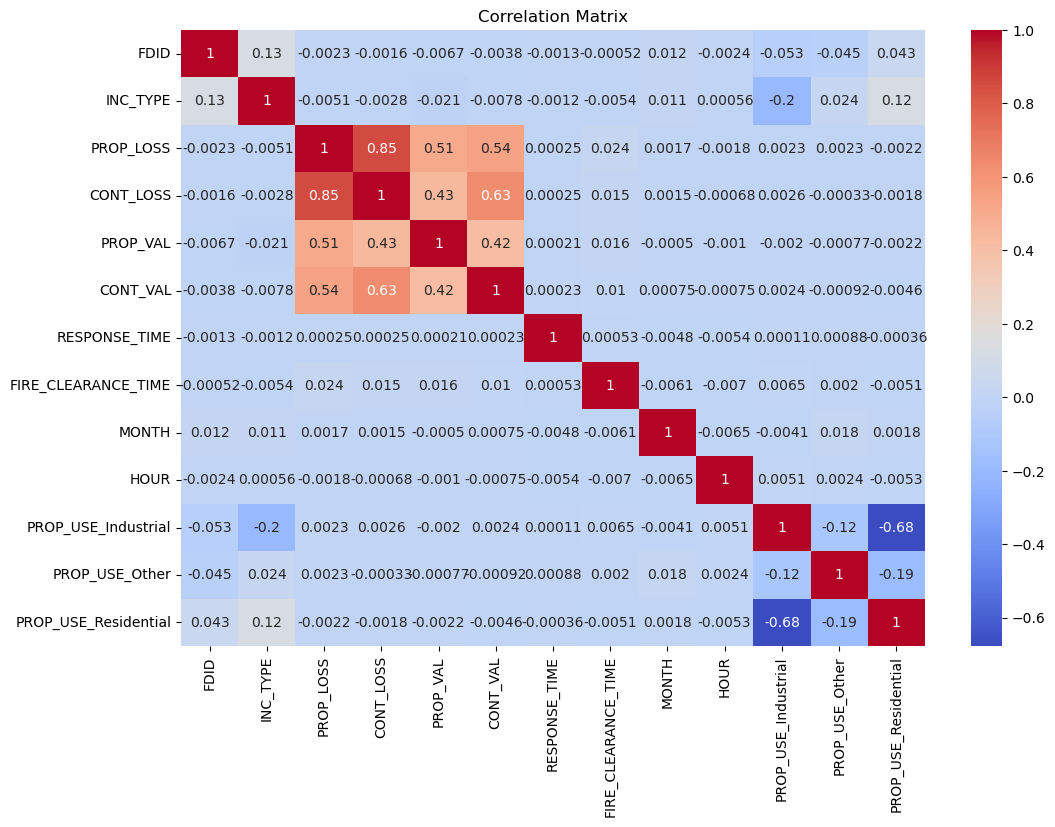

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 定义函数将 PROP_USE 分类为 Residential, Industrial 和 Commercial
def categorize_prop_use(prop_use):
    try:
        prop_use = int(prop_use)
        if 400 <= prop_use <= 464:
            return 'Residential'
        elif 600 <= prop_use <= 984:
            return 'Industrial'
        elif (100 <= prop_use <= 364) or (500 <= prop_use <= 599):
            return 'Commercial'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

# 读取处理后的数据
data_frames = []
for year in range(2015, 2023):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    df = pd.read_csv(file_path)
    data_frames.append(df)

# 合并所有年份的数据
data = pd.concat(data_frames, ignore_index=True)

# 检查数据
print(data.head())

# 检查缺失值
print(data.isnull().sum())

# 删除含有缺失值的行
data.dropna(inplace=True)

# 将 PROP_USE 转换为类别型变量
data['PROP_USE'] = data['PROP_USE'].apply(categorize_prop_use)

# 将类别型变量转换为数值型变量（使用one-hot编码）
data = pd.get_dummies(data, columns=['PROP_USE'], drop_first=True)

# 删除 DISTRICT 列
data.drop(columns=['DISTRICT'], inplace=True)

# 检查处理后的数据
print(data.head())

# 相关性矩阵
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 特征和目标变量
X = data.drop(columns=['FIRE_CLEARANCE_TIME'])
y = data['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 重要特征
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()


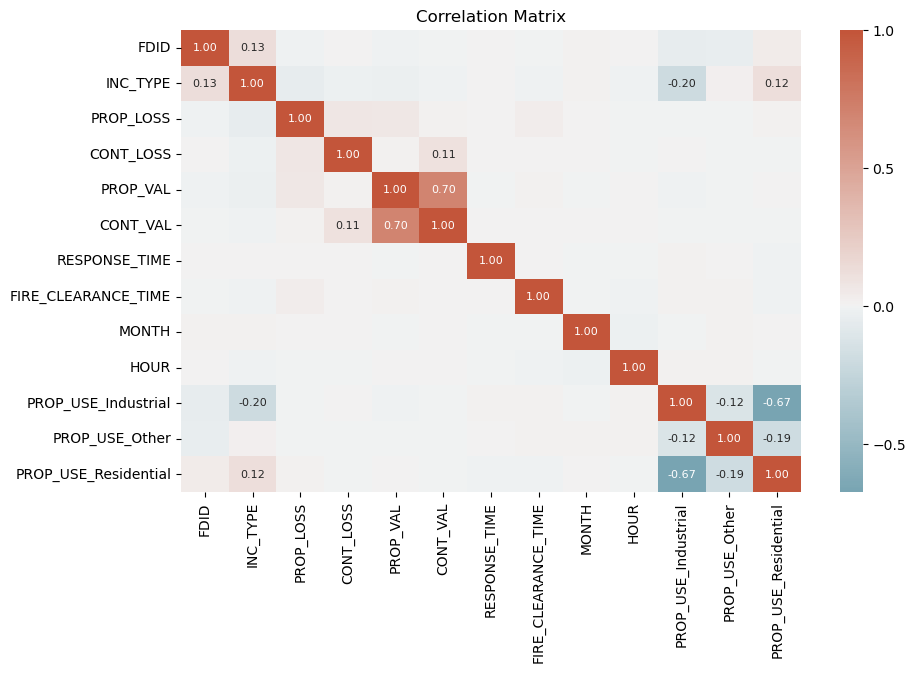

Root Mean Squared Error: 4049.8678638413953


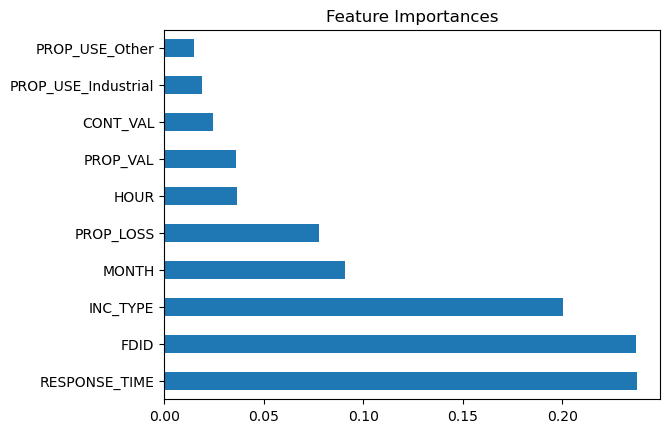

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 定义函数将 PROP_USE 分类为 Residential, Industrial 和 Commercial
def categorize_prop_use(prop_use):
    try:
        prop_use = int(prop_use)
        if 400 <= prop_use <= 464:
            return 'Residential'
        elif 600 <= prop_use <= 984:
            return 'Industrial'
        elif (100 <= prop_use <= 364) or (500 <= prop_use <= 599):
            return 'Commercial'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

# 读取并采样处理后的数据（比如随机抽取10%的数据）
data_frames = []
for year in range(2015, 2023):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    df = pd.read_csv(file_path)
    df_sampled = df.sample(frac=0.1, random_state=42)  # 只使用10%的数据
    data_frames.append(df_sampled)

# 合并所有年份的数据
data = pd.concat(data_frames, ignore_index=True)

# 删除含有缺失值的行
data.dropna(inplace=True)

# 将 PROP_USE 转换为类别型变量
data['PROP_USE'] = data['PROP_USE'].apply(categorize_prop_use)

# 将类别型变量转换为数值型变量（使用one-hot编码）
data = pd.get_dummies(data, columns=['PROP_USE'], drop_first=True)

# 删除 DISTRICT 列
data.drop(columns=['DISTRICT'], inplace=True)

# 相关性矩阵
corr_matrix = data.corr()

# 设置颜色映射的中点为0
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# 自定义的格式化函数
def custom_fmt(x):
    if abs(x) < 0.1:
        return ''
    else:
        return f'{x:.2f}'

# 生成热力图
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap, center=0, annot_kws={"size": 8},
            cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1]})
for text in plt.gca().texts:
    if text.get_text() and abs(float(text.get_text())) < 0.1:
        text.set_text('')

plt.title('Correlation Matrix')
plt.show()

# 特征和目标变量
X = data.drop(columns=['FIRE_CLEARANCE_TIME'])
y = data['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)  # 降低n_estimators数量以减少计算量
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 重要特征
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [5]:
import numpy as np

# 识别和去除异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 去除FIRE_CLEARANCE_TIME的异常值
data_clean = remove_outliers(data, 'FIRE_CLEARANCE_TIME')

# 特征和目标变量
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error after removing outliers: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances after removing outliers')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME after removing outliers')
plt.show()


NameError: name 'data' is not defined

Root Mean Squared Error: 22.436104568094475


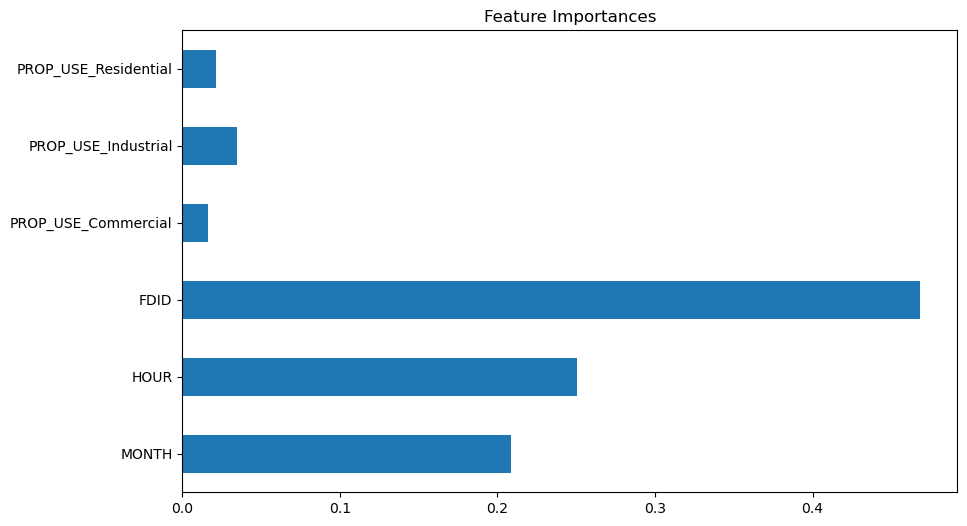

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


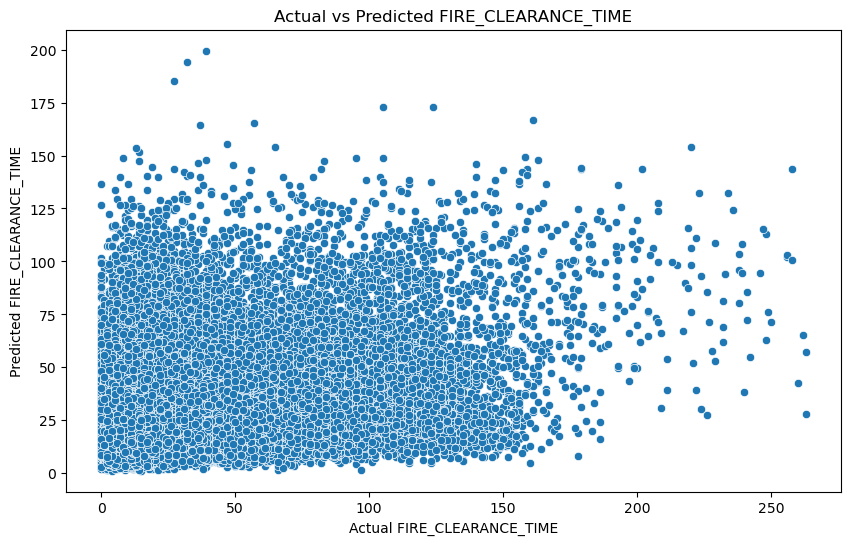

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 定义函数将 PROP_USE 分类为 Residential, Industrial 和 Commercial
def categorize_prop_use(prop_use):
    try:
        prop_use = int(prop_use)
        if 400 <= prop_use <= 464:
            return 'Residential'
        elif 600 <= prop_use <= 984:
            return 'Industrial'
        elif (100 <= prop_use <= 364) or (500 <= prop_use <= 599):
            return 'Commercial'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

# 去除异常值函数
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 分批次读取和处理数据
def process_data_by_chunk(file_path, chunk_size=10000):
    data_frames = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk.dropna(inplace=True)
        chunk['PROP_USE'] = chunk['PROP_USE'].apply(categorize_prop_use)
        chunk['PROP_USE_Commercial'] = chunk['PROP_USE'] == 'Commercial'
        chunk['PROP_USE_Industrial'] = chunk['PROP_USE'] == 'Industrial'
        chunk['PROP_USE_Residential'] = chunk['PROP_USE'] == 'Residential'
        chunk.drop(columns=['DISTRICT', 'PROP_USE'], inplace=True)
        chunk = remove_outliers(chunk, 'FIRE_CLEARANCE_TIME')
        data_frames.append(chunk)
    return pd.concat(data_frames, ignore_index=True)

# 初始化空数据框
data = pd.DataFrame()

# 逐年处理数据并合并
for year in range(2015, 2023):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    data_year = process_data_by_chunk(file_path)
    data = pd.concat([data, data_year], ignore_index=True)

# 特征和目标变量
features = ['MONTH', 'HOUR', 'FDID', 'PROP_USE_Commercial', 'PROP_USE_Industrial', 'PROP_USE_Residential']
X = data[features]
y = data['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 单独训练一个随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME')
plt.show()


Root Mean Squared Error: 18.6049195197065


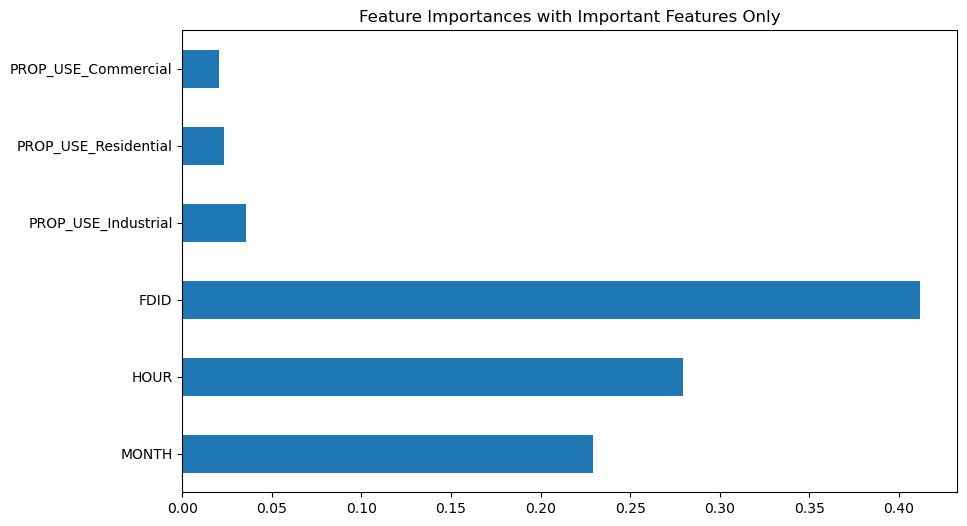

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


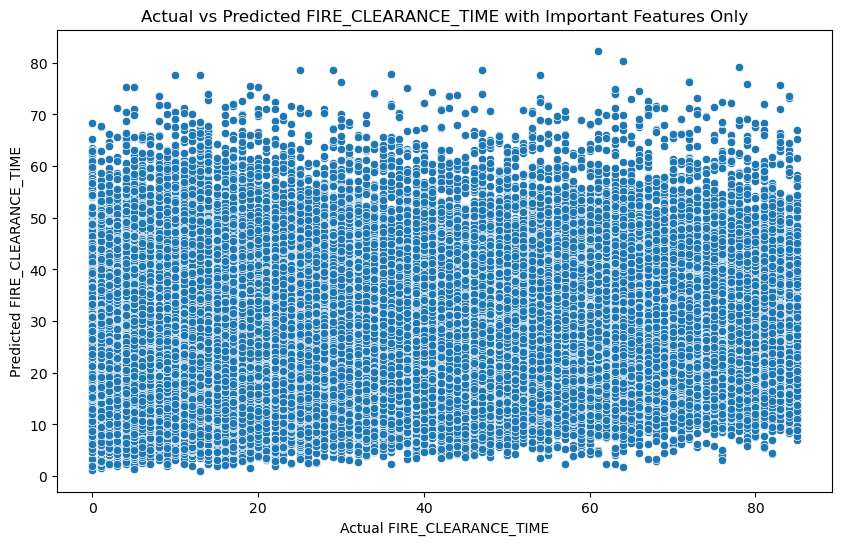

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 读取处理后的数据
data_frames = []
for year in range(2015, 2023):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    df = pd.read_csv(file_path)
    data_frames.append(df)

# 合并所有年份的数据
data = pd.concat(data_frames, ignore_index=True)

# 删除含有缺失值的行
data.dropna(inplace=True)

# 将 PROP_USE 转换为类别型变量
def categorize_prop_use(prop_use):
    try:
        prop_use = int(prop_use)
        if 400 <= prop_use <= 464:
            return 'Residential'
        elif 600 <= prop_use <= 984:
            return 'Industrial'
        elif (100 <= prop_use <= 364) or (500 <= prop_use <= 599):
            return 'Commercial'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

data['PROP_USE'] = data['PROP_USE'].apply(categorize_prop_use)

# 将类别型变量转换为布尔型变量
data['PROP_USE_Commercial'] = data['PROP_USE'] == 'Commercial'
data['PROP_USE_Industrial'] = data['PROP_USE'] == 'Industrial'
data['PROP_USE_Residential'] = data['PROP_USE'] == 'Residential'

# 删除 DISTRICT 列和原始 PROP_USE 列
data.drop(columns=['DISTRICT', 'PROP_USE'], inplace=True)

# 去除FIRE_CLEARANCE_TIME的异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_clean = remove_outliers(data, 'FIRE_CLEARANCE_TIME')

# 只保留重要特征
features = ['MONTH', 'HOUR', 'FDID', 'PROP_USE_Industrial', 'PROP_USE_Residential', 'PROP_USE_Commercial']
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances with Important Features Only')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME with Important Features Only')
plt.show()


   FDID  INC_TYPE DISTRICT  PROP_LOSS  CONT_LOSS  PROP_VAL  CONT_VAL PROP_USE  \
0  1005       131      270        0.0     1000.0       0.0    1000.0      882   
1  1005       111      270    15000.0        0.0  100000.0    5000.0      429   
2  1005       111      270    25000.0    10000.0   25000.0   10000.0      429   
3  1005       162      270        0.0        0.0       0.0       0.0      800   
4  1005       111      270   150000.0    75000.0  150000.0   75000.0      429   

   RESPONSE_TIME  FIRE_CLEARANCE_TIME  MONTH  HOUR  
0            5.0                 13.0     11    17  
1            4.0                136.0     11    13  
2            7.0                144.0     12     6  
3            9.0                  3.0     12    11  
4            6.0                152.0     12    19  
FDID                   0
INC_TYPE               0
DISTRICT               0
PROP_LOSS              0
CONT_LOSS              0
PROP_VAL               0
CONT_VAL               0
PROP_USE            

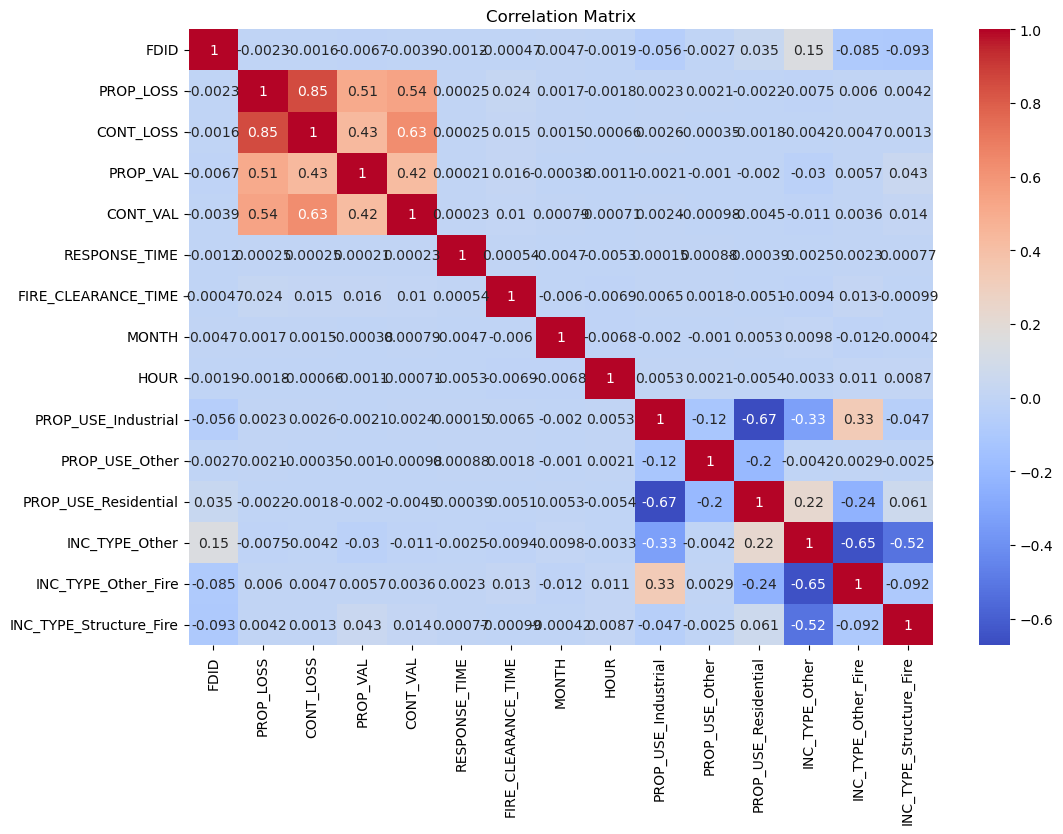

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 定义函数将 PROP_USE 分类为 Residential, Industrial 和 Commercial
def categorize_prop_use(prop_use):
    try:
        prop_use = int(prop_use)
        if 400 <= prop_use <= 464:
            return 'Residential'
        elif 600 <= prop_use <= 984:
            return 'Industrial'
        elif (100 <= prop_use <= 364) or (500 <= prop_use <= 599):
            return 'Commercial'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

# 定义函数将 INC_TYPE 分类为不同的火灾类型
def categorize_inc_type(inc_type):
    try:
        inc_type = int(inc_type)
        if 100 <= inc_type <= 118:
            return 'Structure_Fire'
        elif 121 <= inc_type <= 138:
            return 'Mobile_Property_Fire'
        elif (141 <= inc_type <= 143) or (151 <= inc_type <= 155) or (161 <= inc_type <= 164) or (171 <= inc_type <= 173) or inc_type == 100:
            return 'Other_Fire'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

# 读取处理后的数据
data_frames = []
for year in range(2015, 2023):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    df = pd.read_csv(file_path)
    data_frames.append(df)

# 合并所有年份的数据
data = pd.concat(data_frames, ignore_index=True)

# 检查数据
print(data.head())

# 检查缺失值
print(data.isnull().sum())

# 删除含有缺失值的行
data.dropna(inplace=True)

# 将 PROP_USE 转换为类别型变量
data['PROP_USE'] = data['PROP_USE'].apply(categorize_prop_use)

# 将 INC_TYPE 转换为类别型变量
data['INC_TYPE'] = data['INC_TYPE'].apply(categorize_inc_type)

# 将类别型变量转换为数值型变量（使用one-hot编码）
data = pd.get_dummies(data, columns=['PROP_USE', 'INC_TYPE'], drop_first=True)

# 删除 DISTRICT 列
data.drop(columns=['DISTRICT'], inplace=True)

# 检查处理后的数据
print(data.head())

# 相关性矩阵
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 特征和目标变量
X = data.drop(columns=['FIRE_CLEARANCE_TIME'])
y = data['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 重要特征
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [5]:
import pandas as pd

# 定义函数将 PROP_USE 和 INC_TYPE 分类为不同的类型
def categorize_prop_use(prop_use):
    try:
        prop_use = int(prop_use)
        if 400 <= prop_use <= 464:
            return 'Residential'
        elif 600 <= prop_use <= 984:
            return 'Industrial'
        elif (100 <= prop_use <= 364) or (500 <= prop_use <= 599):
            return 'Commercial'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

def categorize_inc_type(inc_type):
    try:
        inc_type = int(inc_type)
        if 100 <= inc_type <= 118:
            return 'Structure_Fire'
        elif 121 <= inc_type <= 138:
            return 'Mobile_Property_Fire'
        elif (141 <= inc_type <= 143) or (151 <= inc_type <= 155) or (161 <= inc_type <= 164) or (171 <= inc_type <= 173) or inc_type == 100:
            return 'Other_Fire'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

# 分批次读取和处理数据
def process_data_by_chunk(file_path, chunk_size=10000):
    data_frames = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk.dropna(inplace=True)
        chunk['PROP_USE'] = chunk['PROP_USE'].apply(categorize_prop_use)
        chunk['INC_TYPE'] = chunk['INC_TYPE'].apply(categorize_inc_type)
        chunk = pd.get_dummies(chunk, columns=['PROP_USE', 'INC_TYPE'], drop_first=True)
        chunk.drop(columns=['DISTRICT'], inplace=True)
        data_frames.append(chunk)
    return pd.concat(data_frames, ignore_index=True)

# 初始化空数据框
data = pd.DataFrame()

# 逐年处理数据并合并
for year in range(2015, 2023):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    data_year = process_data_by_chunk(file_path)
    data = pd.concat([data, data_year], ignore_index=True)
    print(f'Processed year {year}, current data shape: {data.shape}')

# 删除含有缺失值的行
data.dropna(inplace=True)

# 确保所有需要的列存在
for col in ['PROP_USE_Commercial', 'PROP_USE_Industrial', 'PROP_USE_Residential', 
            'INC_TYPE_Structure_Fire', 'INC_TYPE_Mobile_Property_Fire', 'INC_TYPE_Other_Fire']:
    if col not in data.columns:
        data[col] = 0

# 去除FIRE_CLEARANCE_TIME的异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_clean = remove_outliers(data, 'FIRE_CLEARANCE_TIME')

# 检查处理后的数据
print(data_clean.head())
print(data_clean.isnull().sum())

# 保存处理后的数据
data_clean.to_csv('processed_data.csv', index=False)


Processed year 2015, current data shape: (21790, 15)
Processed year 2016, current data shape: (129677, 15)
Processed year 2017, current data shape: (163324, 15)
Processed year 2018, current data shape: (325731, 15)
Processed year 2019, current data shape: (866242, 15)
Processed year 2020, current data shape: (921726, 15)
Processed year 2021, current data shape: (977920, 15)
Processed year 2022, current data shape: (1016056, 15)
   FDID  PROP_LOSS  CONT_LOSS  PROP_VAL  CONT_VAL  RESPONSE_TIME  \
0  1005        0.0     1000.0       0.0    1000.0            5.0   
3  1005        0.0        0.0       0.0       0.0            9.0   
5  1005        0.0        0.0       0.0       0.0            3.0   
6  1005        0.0        0.0       0.0       0.0            4.0   
7  1005     2500.0     2500.0    2500.0    2500.0            3.0   

   FIRE_CLEARANCE_TIME  MONTH  HOUR  PROP_USE_Industrial  PROP_USE_Other  \
0                 13.0     11    17                 True           False   
3      

Root Mean Squared Error: 18.51847358826329


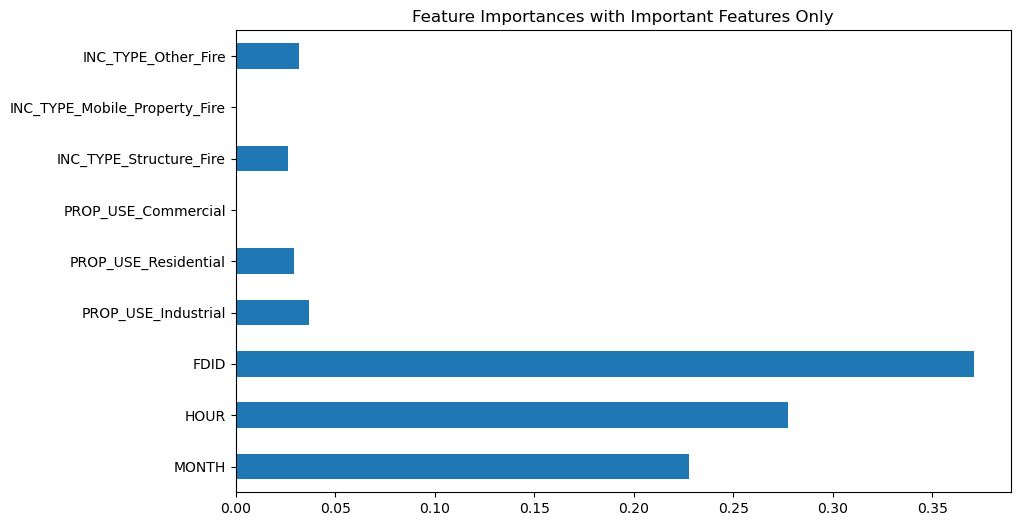

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


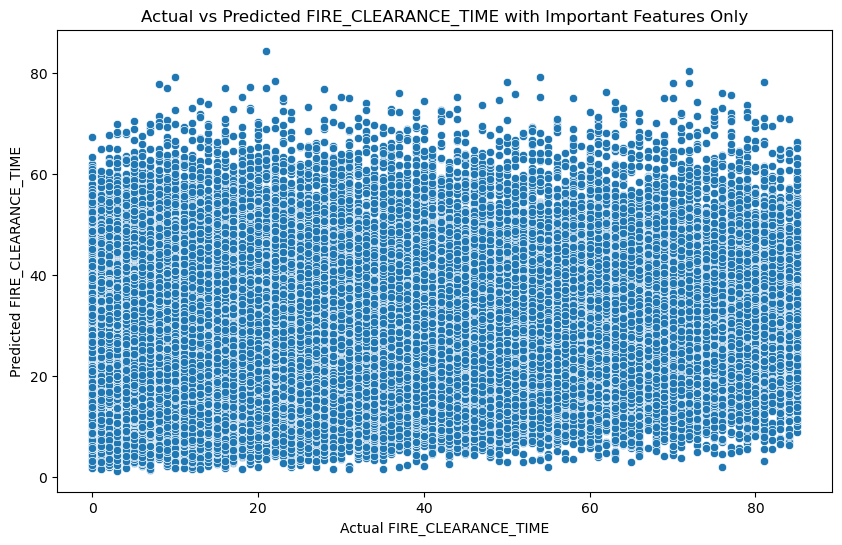

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 读取处理后的数据
data_clean = pd.read_csv('processed_data.csv')

# 只保留重要特征
features = ['MONTH', 'HOUR', 'FDID', 'PROP_USE_Industrial', 'PROP_USE_Residential', 'PROP_USE_Commercial',
            'INC_TYPE_Structure_Fire', 'INC_TYPE_Mobile_Property_Fire', 'INC_TYPE_Other_Fire']
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances with Important Features Only')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME with Important Features Only')
plt.show()


Root Mean Squared Error: 18.518393594600276


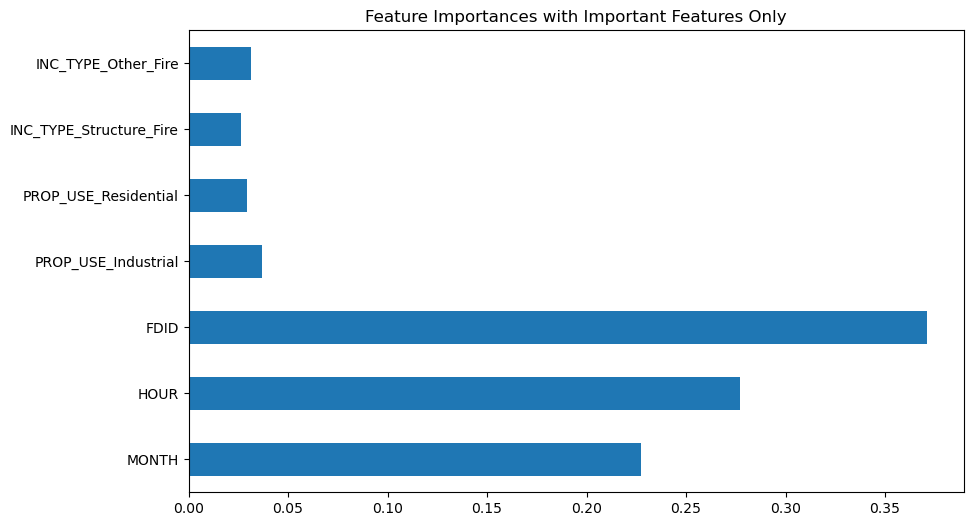

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


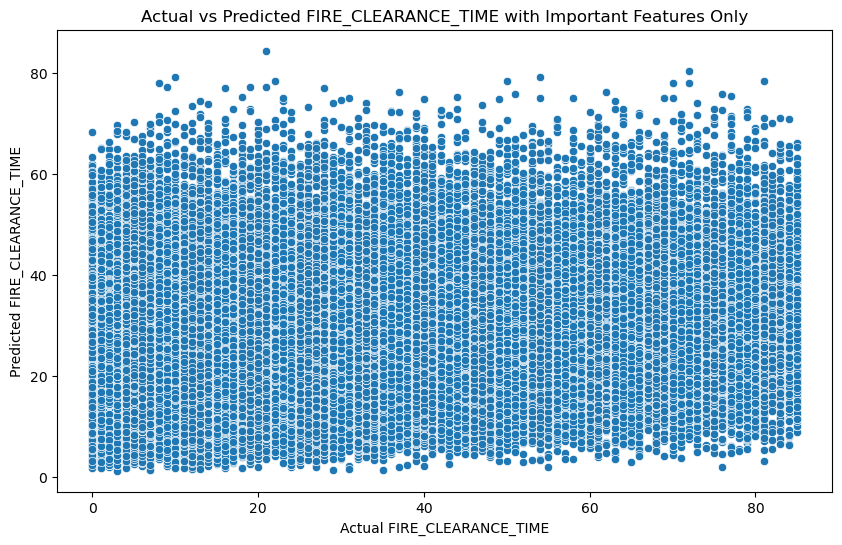

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 读取处理后的数据
data_clean = pd.read_csv('processed_data.csv')

# 只保留相关性较高的特征
features = ['MONTH', 'HOUR', 'FDID', 'PROP_USE_Industrial', 'PROP_USE_Residential',
            'INC_TYPE_Structure_Fire', 'INC_TYPE_Other_Fire']
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances with Important Features Only')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME with Important Features Only')
plt.show()


Root Mean Squared Error: 18.47696982943392


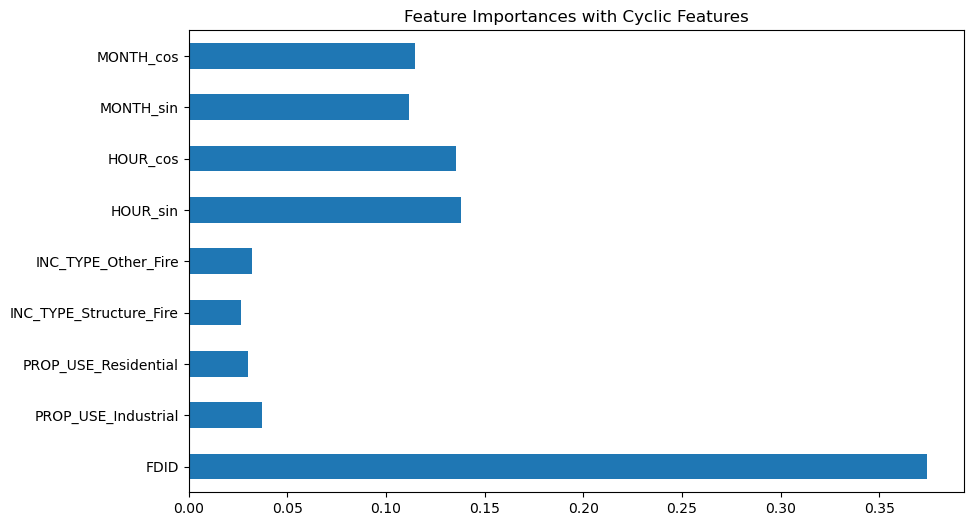

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


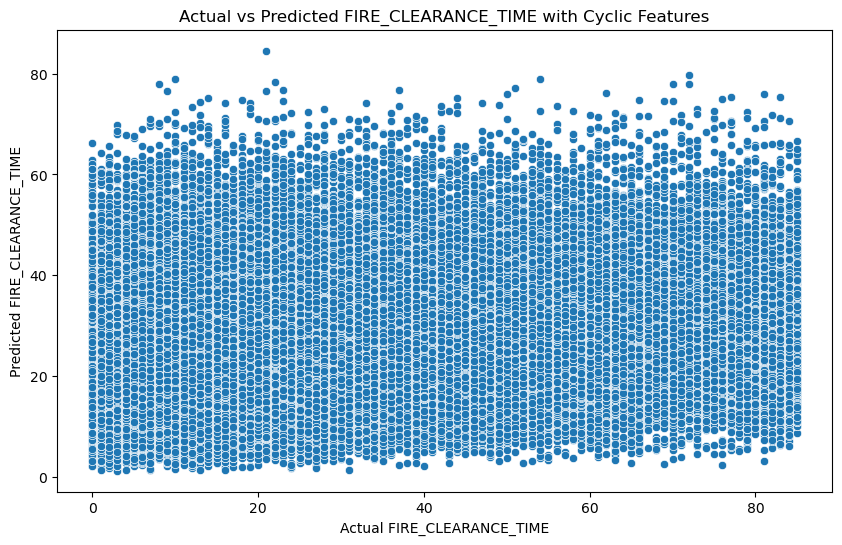

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 读取处理后的数据
data_clean = pd.read_csv('processed_data.csv')

# 定义函数将时间特征转换为周期性特征
def add_cyclic_features(df, column, max_value):
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

# 对小时和月份进行周期性转换
data_clean = add_cyclic_features(data_clean, 'HOUR', 24)
data_clean = add_cyclic_features(data_clean, 'MONTH', 12)

# 只保留重要特征和转换后的周期性特征
features = ['FDID', 'PROP_USE_Industrial', 'PROP_USE_Residential',
            'INC_TYPE_Structure_Fire', 'INC_TYPE_Other_Fire', 
            'HOUR_sin', 'HOUR_cos', 'MONTH_sin', 'MONTH_cos']
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances with Cyclic Features')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME with Cyclic Features')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用 Grid Search 进行超参数调优
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最优模型
best_model = grid_search.best_estimator_

# 预测
y_pred = best_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error after optimization: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances after optimization')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME after optimization')
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits


Processed year 2015, current data shape: (21790, 15)
Processed year 2016, current data shape: (129677, 15)
Processed year 2017, current data shape: (163324, 15)
Processed year 2018, current data shape: (325731, 15)
Processed year 2019, current data shape: (866242, 15)
Processed year 2020, current data shape: (921726, 15)
Processed year 2021, current data shape: (977920, 15)
Processed year 2022, current data shape: (1016056, 15)
   FDID  PROP_USE_Industrial  PROP_USE_Residential  INC_TYPE_Structure_Fire  \
0  1005                 True                 False                    False   
3  1005                 True                 False                    False   
5  1005                 True                 False                    False   
6  1005                False                 False                     True   
7  1005                False                  True                     True   

  INC_TYPE_Other_Fire      HOUR_sin  HOUR_cos     MONTH_sin  MONTH_cos  
0               Fals

/tmp/ipykernel_57930/4279496400.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / max_value)
/tmp/ipykernel_57930/4279496400.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / max_value)
/tmp/ipykernel_57930/4279496400.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Root Mean Squared Error after optimization: 17.64865358310127


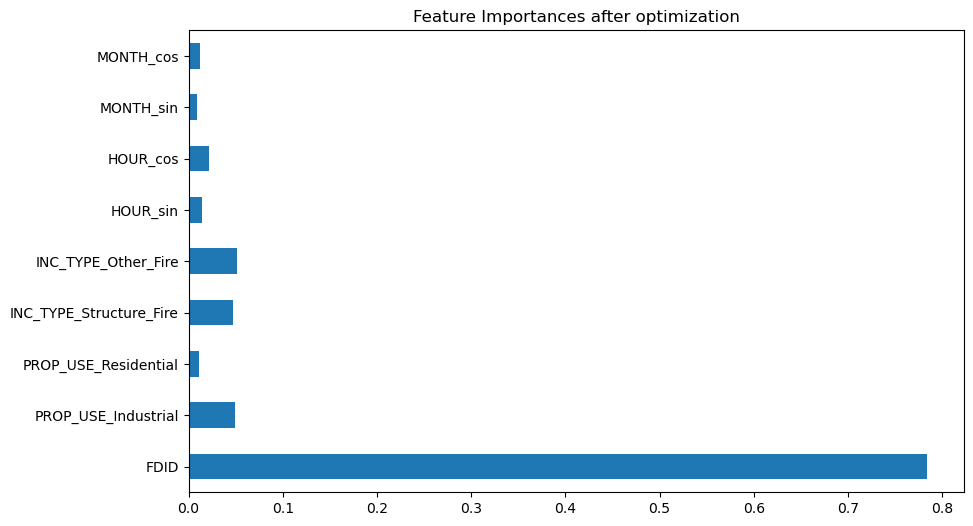

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


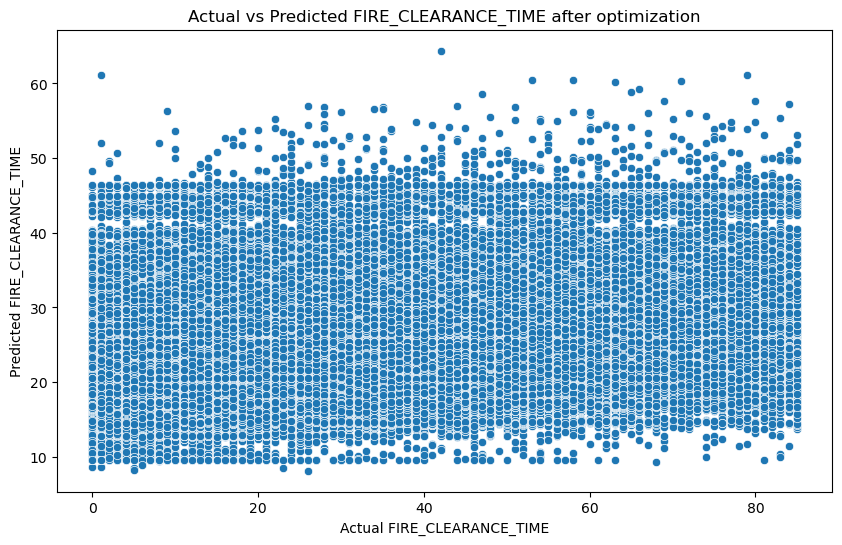

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 定义函数将时间特征转换为周期性特征
def add_cyclic_features(df, column, max_value):
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

# 定义函数将 PROP_USE 和 INC_TYPE 分类为不同的类型
def categorize_prop_use(prop_use):
    try:
        prop_use = int(prop_use)
        if 400 <= prop_use <= 464:
            return 'Residential'
        elif 600 <= prop_use <= 984:
            return 'Industrial'
        elif (100 <= prop_use <= 364) or (500 <= prop_use <= 599):
            return 'Commercial'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

def categorize_inc_type(inc_type):
    try:
        inc_type = int(inc_type)
        if 100 <= inc_type <= 118:
            return 'Structure_Fire'
        elif 121 <= inc_type <= 138:
            return 'Mobile_Property_Fire'
        elif (141 <= inc_type <= 143) or (151 <= inc_type <= 155) or (161 <= inc_type <= 164) or (171 <= inc_type <= 173) or inc_type == 100:
            return 'Other_Fire'
        else:
            return 'Other'
    except ValueError:
        return 'Other'

# 分批次读取和处理数据
def process_data_by_chunk(file_path, chunk_size=10000):
    data_frames = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk.dropna(inplace=True)
        chunk['PROP_USE'] = chunk['PROP_USE'].apply(categorize_prop_use)
        chunk['INC_TYPE'] = chunk['INC_TYPE'].apply(categorize_inc_type)
        chunk = pd.get_dummies(chunk, columns=['PROP_USE', 'INC_TYPE'], drop_first=True)
        chunk.drop(columns=['DISTRICT'], inplace=True)
        data_frames.append(chunk)
    return pd.concat(data_frames, ignore_index=True)

# 初始化空数据框
data = pd.DataFrame()

# 逐年处理数据并合并
for year in range(2015, 2023):
    file_path = f'morans_data/{year}/basicincident_pro_{year}.csv'
    data_year = process_data_by_chunk(file_path)
    data = pd.concat([data, data_year], ignore_index=True)
    print(f'Processed year {year}, current data shape: {data.shape}')

# 删除含有缺失值的行
data.dropna(inplace=True)

# 确保所有需要的列存在
for col in ['PROP_USE_Commercial', 'PROP_USE_Industrial', 'PROP_USE_Residential', 
            'INC_TYPE_Structure_Fire', 'INC_TYPE_Mobile_Property_Fire', 'INC_TYPE_Other_Fire']:
    if col not in data.columns:
        data[col] = 0

# 去除FIRE_CLEARANCE_TIME的异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_clean = remove_outliers(data, 'FIRE_CLEARANCE_TIME')

# 对小时和月份进行周期性转换
data_clean = add_cyclic_features(data_clean, 'HOUR', 24)
data_clean = add_cyclic_features(data_clean, 'MONTH', 12)

# 只保留重要特征和转换后的周期性特征
features = ['FDID', 'PROP_USE_Industrial', 'PROP_USE_Residential', 'INC_TYPE_Structure_Fire', 'INC_TYPE_Other_Fire', 
            'HOUR_sin', 'HOUR_cos', 'MONTH_sin', 'MONTH_cos']
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

# 检查数据是否存在问题
print(X.head())
print(X.isnull().sum())
print(y.isnull().sum())

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用GridSearchCV优化模型
param_grid = {
    'n_estimators': [50, 100],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

# 最优模型
best_model = grid_search.best_estimator_

# 保存模型
joblib.dump(best_model, 'fire_clearance_model.pkl')

# 预测
y_pred = best_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error after optimization: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances after optimization')
plt.show()

# 评估模型的性能
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FIRE_CLEARANCE_TIME')
plt.ylabel('Predicted FIRE_CLEARANCE_TIME')
plt.title('Actual vs Predicted FIRE_CLEARANCE_TIME after optimization')
plt.show()


In [3]:
import joblib
import numpy as np
import pandas as pd

# 加载保存的模型
model = joblib.load('fire_clearance_model.pkl')

# 定义新的火灾事件特征
new_event = {
    'FDID': 1005,
    'PROP_USE_Industrial': 0,
    'PROP_USE_Residential': 1,
    'INC_TYPE_Structure_Fire': 1,
    'INC_TYPE_Other_Fire': 0,
    'HOUR': 14,  # 下午2点
    'MONTH': 5   # 5月
}

# 将时间特征转换为周期性特征
new_event['HOUR_sin'] = np.sin(2 * np.pi * new_event['HOUR'] / 24)
new_event['HOUR_cos'] = np.cos(2 * np.pi * new_event['HOUR'] / 24)
new_event['MONTH_sin'] = np.sin(2 * np.pi * new_event['MONTH'] / 12)
new_event['MONTH_cos'] = np.cos(2 * np.pi * new_event['MONTH'] / 12)

# 删除原始时间特征
del new_event['HOUR']
del new_event['MONTH']

# 将新事件特征转换为DataFrame格式并进行预测
new_event_df = pd.DataFrame([new_event])
predicted_clearance_time = model.predict(new_event_df)[0]

print(f'Predicted FIRE_CLEARANCE_TIME: {predicted_clearance_time}')


Predicted FIRE_CLEARANCE_TIME: 22.686975237393053


In [4]:
import joblib
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load the trained model
model = joblib.load('fire_clearance_model.pkl')

# Define the input widgets
fdid = widgets.Text(value='12345', description='FDID:', placeholder='Enter FDID')
prop_use_industrial = widgets.Dropdown(options=[0, 1], value=0, description='Industrial')
prop_use_residential = widgets.Dropdown(options=[0, 1], value=1, description='Residential')
inc_type_structure_fire = widgets.Dropdown(options=[0, 1], value=1, description='Structure Fire')
inc_type_other_fire = widgets.Dropdown(options=[0, 1], value=0, description='Other Fire')
hour = widgets.IntSlider(value=14, min=0, max=23, description='Hour')
month = widgets.IntSlider(value=5, min=1, max=12, description='Month')
output_label = widgets.Label(value="")

# Display the widgets
display(fdid, prop_use_industrial, prop_use_residential, inc_type_structure_fire, inc_type_other_fire, hour, month, output_label)

def predict_fire_clearance(fdid, prop_use_industrial, prop_use_residential, inc_type_structure_fire, inc_type_other_fire, hour, month):
    # Validate FDID input
    try:
        fdid_value = int(fdid)
    except ValueError:
        output_label.value = "Please enter a valid numeric FDID."
        return

    # Calculate cyclic features
    hour_sin = np.sin(2 * np.pi * hour / 24)
    hour_cos = np.cos(2 * np.pi * hour / 24)
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)

    # Create a dictionary for the new event
    new_event = {
        'FDID': fdid_value,
        'PROP_USE_Industrial': prop_use_industrial,
        'PROP_USE_Residential': prop_use_residential,
        'INC_TYPE_Structure_Fire': inc_type_structure_fire,
        'INC_TYPE_Other_Fire': inc_type_other_fire,
        'HOUR_sin': hour_sin,
        'HOUR_cos': hour_cos,
        'MONTH_sin': month_sin,
        'MONTH_cos': month_cos
    }

    # Convert to DataFrame
    new_event_df = pd.DataFrame([new_event])

    # Predict the fire clearance time
    predicted_clearance_time = model.predict(new_event_df)[0]

    # Output the prediction to the label
    output_label.value = f'Predicted FIRE_CLEARANCE_TIME: {predicted_clearance_time:.2f} minutes'

# Create the button and link it to the prediction function
button = widgets.Button(description="Predict Fire Clearance Time")
button.on_click(lambda x: predict_fire_clearance(
    fdid.value, prop_use_industrial.value, prop_use_residential.value,
    inc_type_structure_fire.value, inc_type_other_fire.value,
    hour.value, month.value
))

display(button)


Text(value='12345', description='FDID:', placeholder='Enter FDID')

Dropdown(description='Industrial', options=(0, 1), value=0)

Dropdown(description='Residential', index=1, options=(0, 1), value=1)

Dropdown(description='Structure Fire', index=1, options=(0, 1), value=1)

Dropdown(description='Other Fire', options=(0, 1), value=0)

IntSlider(value=14, description='Hour', max=23)

IntSlider(value=5, description='Month', max=12, min=1)

Label(value='')

Button(description='Predict Fire Clearance Time', style=ButtonStyle())

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 加载数据并进行预处理
# 假设data_clean已经是预处理好的数据集

# 分割数据集
features = ['FDID', 'PROP_USE_Industrial', 'PROP_USE_Residential', 'INC_TYPE_Structure_Fire', 'INC_TYPE_Other_Fire', 
            'HOUR_sin', 'HOUR_cos', 'MONTH_sin', 'MONTH_cos']
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# 查看特征重要性
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# 敏感性分析 - 单变量分析
sensitivity_results = {}
for feature in features:
    X_test_mod = X_test.copy()
    X_test_mod[feature] = X_test_mod[feature] * 1.1  # 增加10%
    y_pred_mod = model.predict(X_test_mod)
    mse_mod = mean_squared_error(y_test, y_pred_mod)
    rmse_mod = mse_mod ** 0.1
    sensitivity_results[feature] = rmse_mod

# 展示敏感性分析结果
sensitivity_df = pd.DataFrame(list(sensitivity_results.items()), columns=['Feature', 'RMSE'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='RMSE', data=sensitivity_df)
plt.title('Sensitivity Analysis Results')
plt.show()


NameError: name 'data_clean' is not defined

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

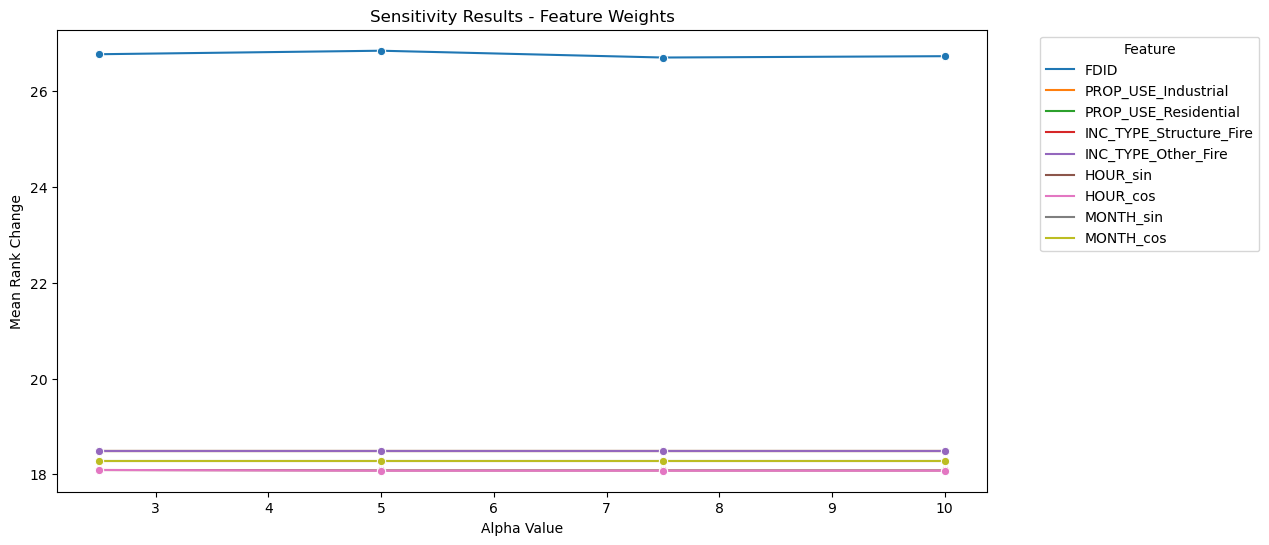

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 加载数据并进行预处理
# 假设data_clean已经是预处理好的数据集

# 分割数据集
features = ['FDID', 'PROP_USE_Industrial', 'PROP_USE_Residential', 'INC_TYPE_Structure_Fire', 'INC_TYPE_Other_Fire', 
            'HOUR_sin', 'HOUR_cos', 'MONTH_sin', 'MONTH_cos']
X = data_clean[features]
y = data_clean['FIRE_CLEARANCE_TIME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 敏感性分析
alphas = [2.5, 5.0, 7.5, 10.0]
sensitivity_results = []

for alpha in alphas:
    for feature in features:
        X_test_mod = X_test.copy()
        X_test_mod[feature] = X_test_mod[feature] * alpha
        y_pred_mod = model.predict(X_test_mod)
        mse_mod = mean_squared_error(y_test, y_pred_mod)
        rmse_mod = mse_mod ** 0.5
        sensitivity_results.append({
            'Feature': feature,
            'Alpha': alpha,
            'RMSE': rmse_mod
        })

sensitivity_df = pd.DataFrame(sensitivity_results)

# 进行可视化
plt.figure(figsize=(12, 6))
sns.lineplot(data=sensitivity_df, x='Alpha', y='RMSE', hue='Feature', marker='o')
plt.title('Sensitivity Results - Feature Weights')
plt.xlabel('Alpha Value')
plt.ylabel('Mean Rank Change')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
